In [1]:
import numpy as np
import string
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def prepo(text):
    return "".join((char.upper() if char.isalpha() else " ") for char in text).split()
def textToMat(text):
    result = []
    for e in text:
        if len(e)==1:
            result.append(np.reshape([ord(c.upper())-64 for c in e],(1,1)))
        elif len(e)==2:
            result.append(np.reshape([ord(c.upper())-64 for c in e],(2,1)))
        elif len(e)<=4:
            result.append(np.reshape([ord(c.upper())-64 for c in e.ljust(4,"@")],(2,2)))
        else:
            result.append(np.reshape([ord(c.upper())-64 for c in e.ljust(9,"@")],(3,3)))
    return result

In [3]:
def toplot(clist,colorm="nipy_spectral"):
    cmap = getattr(plt.cm,colorm)  # define the colormap
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # force the first color entry to be grey
    cmaplist[0] = (0, 0, 0, 0)

    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N)

    # define the bins and normalize
    bounds = np.linspace(0, 26, 27)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    
    l = len(clist)
    sides = ('left', 'right', 'top', 'bottom')
    nolabels = {s: False for s in sides}
    nolabels.update({'label%s' % s: False for s in sides})
    
    with plt.rc_context(rc={'axes.grid': False}):
        fig, axes = plt.subplots(1, l, figsize=(3*l, 3))
        for i in range(l):
            axes[i].matshow(clist[i],
                  cmap=cmap, norm=norm)
            axes[i].tick_params(axis='both', which='both', **nolabels)
            axes[i].set_title(prepo("".join([chr(c+64) for c in clist[i].flatten()]))[0])

In [4]:
alphas =  [c for c in string.ascii_uppercase];alphas
alpham = textToMat(alphas)

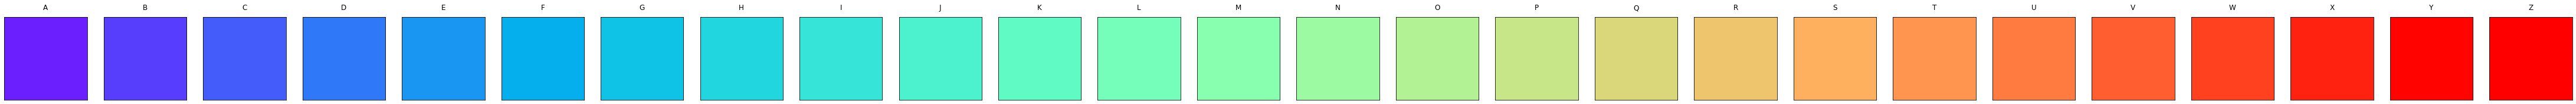

In [5]:
toplot(alpham,"rainbow")

In [6]:
text = 'PyTorch是使用GPU和CPU优化的深度学习张量库。'
eng_text = 'PyTorch is an optimized tensor library for deep learning using GPUs and CPUs.'

In [7]:
temp = prepo(eng_text);print(temp)
ok = textToMat(prepo(eng_text))

['PYTORCH', 'IS', 'AN', 'OPTIMIZED', 'TENSOR', 'LIBRARY', 'FOR', 'DEEP', 'LEARNING', 'USING', 'GPUS', 'AND', 'CPUS']


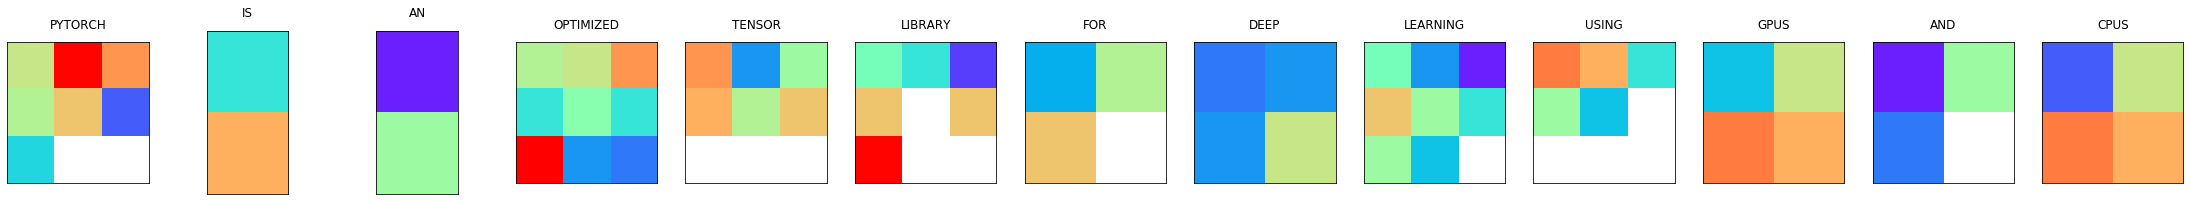

In [8]:
toplot(ok,"rainbow")